In [1]:
import utils
import importlib
importlib.reload(utils)
from utils import *

/home/rodixxi/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [2]:
#fi_sklearn = rf_feat_importance(rf, X_test)
#plot_fi(fi_sklearn, False, 'Sklearn');

In [3]:
path_dataset = "dataset/bikes_day.csv"
df = pd.read_csv(path_dataset, index_col=0, parse_dates=['dteday'])

In [4]:
df.sample(10)

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,,,,,,,,,,,,,,,
517,2012-05-31,2,1,5,0,4,1,1,0.680000,0.631329,0.492917,0.195279,1100,6238,7338
542,2012-06-25,3,1,6,0,1,1,1,0.715833,0.654042,0.504167,0.300383,1139,5640,6779
393,2012-01-28,1,1,1,0,6,0,1,0.315833,0.326379,0.543333,0.210829,775,3248,4023
155,2011-06-04,2,0,6,0,6,0,1,0.635000,0.594696,0.456250,0.123142,1869,3473,5342
314,2011-11-10,4,0,11,0,4,1,2,0.380000,0.373721,0.813333,0.189067,190,2743,2933
596,2012-08-18,3,1,8,0,6,0,1,0.678333,0.618071,0.603333,0.177867,2827,5038,7865
48,2011-02-17,1,0,2,0,4,1,1,0.435833,0.428658,0.505000,0.230104,259,2216,2475
271,2011-09-28,4,0,9,0,3,1,2,0.635000,0.575158,0.848750,0.148629,480,3427,3907
1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985


In [5]:
df.dtypes

dteday        datetime64[ns]
season                 int64
yr                     int64
mnth                   int64
holiday                int64
weekday                int64
workingday             int64
weathersit             int64
temp                 float64
atemp                float64
hum                  float64
windspeed            float64
casual                 int64
registered             int64
cnt                    int64
dtype: object

In [6]:
#Backup df
df_bk = df

In [7]:
# Drop date
df = df.drop(["dteday"], axis=1)

# Dado que el campo "cnt" que contiene la cantidad de bicicletas
# rentadas ese dia es igual(=) a la suma de las personas casuales
# mas la resgistradas que renron una bicicleta procederemos a predecir
# estos dos ultimos por separado

In [8]:
df_casual = df.drop(["registered", "cnt"], axis=1)
df_registered = df.drop(["casual", "cnt"], axis=1)

In [9]:
df_casual.sample(5)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual
instant,,,,,,,,,,,,
208,3,0,7,0,3,1,1,0.775000,0.690667,0.402917,0.183463,755
104,2,0,4,0,4,1,1,0.467500,0.462742,0.540417,0.110700,529
386,1,1,1,0,6,0,2,0.173333,0.174875,0.831250,0.222642,67
215,3,0,8,0,3,1,2,0.731667,0.679937,0.657500,0.135583,467
389,1,1,1,0,2,1,1,0.342500,0.349108,0.835833,0.123767,439


In [10]:
df_registered.sample(5)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,registered
instant,,,,,,,,,,,,
379,1,1,1,0,6,0,1,0.180000,0.183087,0.457500,0.187183,2160
606,3,1,8,0,2,1,1,0.728333,0.666050,0.620000,0.190925,6105
139,2,0,5,0,4,1,2,0.530833,0.510742,0.829583,0.108213,3840
254,3,0,9,0,0,0,1,0.653333,0.609229,0.713750,0.115054,3413
28,1,0,1,0,5,1,2,0.203478,0.223317,0.793043,0.123300,1129


In [11]:
#Empezamos por los casuales
X = df_casual.drop(["casual"], axis=1)
y = df_casual["casual"]
stratify = df_casual[["season", "yr"]]

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, stratify=stratify)

# Utilizare el metodo de random forest dado que no le aplique en la practica a este momento

In [13]:
from sklearn.ensemble import RandomForestRegressor
import numpy as np
from sklearn.metrics import mean_squared_error

def root_mean_squared_error(y_test, y_predict):
    return np.sqrt(mean_squared_error(y_test, y_predict))

In [24]:
pruebas = range(1,100)
n_trees = list(pruebas)
rmses_train = []
rmses_test = []
r2_train = []
r2_test = []
for n in n_trees:
    random_tree_forest = RandomForestRegressor(n_estimators=n)
    random_tree_forest.fit(X_train, y_train)
    y_predict = random_tree_forest.predict(X_train)
    score = root_mean_squared_error(y_train, y_predict)
    rmses_train.append(score)
    r2 = random_tree_forest.score(X_train, y_train)
    r2_train.append(r2)
    y_predict = random_tree_forest.predict(X_test)
    score = root_mean_squared_error(y_test, y_predict)
    rmses_test.append(score)
    r2 = random_tree_forest.score(X_test, y_test)
    r2_test.append(r2)
    

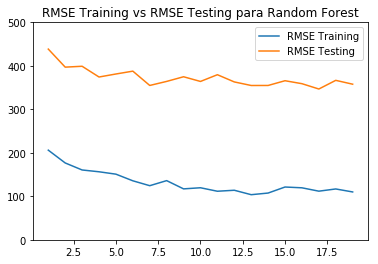

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline 
plt.plot(pruebas, rmses_train, label='RMSE Training')
plt.plot(pruebas, rmses_test, label='RMSE Testing')
plt.ylim((0, 500))
plt.legend(loc="best")
plt.title("RMSE Training vs RMSE Testing para Random Forest")
plt.show()

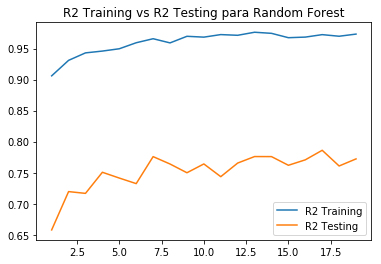

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline 
plt.plot(pruebas, r2_train, label='R2 Training')
plt.plot(pruebas, r2_test, label='R2 Testing')
plt.legend(loc="best")
plt.title("R2 Training vs R2 Testing para Random Forest")
plt.show()

# Elejire 10 armboles por que me pinta

In [26]:
random_tree_forest_casual = RandomForestRegressor(n_estimators=10)
random_tree_forest_casual.fit(X_train, y_train)
y_pred_c = random_tree_forest_casual.predict(X_test)
val_real_c = pd.Series(y_test.values)
val_pred_c = pd.Series(y_pred_c)

X = df_registered.drop(["registered"], axis=1)
y = df_registered["registered"]
stratify = df_registered[["season", "yr"]]

X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(X, y, test_size=0.33, stratify=stratify)

random_tree_forest_registered = RandomForestRegressor(n_estimators=10)
random_tree_forest_registered.fit(X_train_r, y_train_r)
y_pred_r = random_tree_forest_registered.predict(X_test_r)
val_real_r = pd.Series(y_test_r.values)
val_pred_r = pd.Series(y_pred_r)

In [30]:
predicciones = pd.concat([val_real_c.rename('Valor real Casual'),val_pred_c.rename('Valor Pred Casual'), abs(val_pred_c - val_real_c).rename('Dif Casual'), val_real_r.rename('Valor real Registrados'), val_pred_r.rename('Valor Pred Registrados'), abs(val_pred_r - val_real_r).rename('Diff Registrados'), abs(val_real_r + val_real_c).rename('Total Real'), abs(val_pred_r + val_pred_c).rename('Total Pred')] ,  axis=1)

In [31]:
predicciones.head(10)

,Valor real Casual,Valor Pred Casual,Dif Casual,Valor real Registrados,Valor Pred Registrados,Diff Registrados,Total Real,Total Pred
0,141,326.4,185.4,2468,2557.2,89.2,2609,2883.6
1,678,734.6,56.6,4414,4305.9,108.1,5092,5040.5
2,1319,1309.7,9.3,4692,5513.7,821.7,6011,6823.4
3,203,182.4,20.6,3308,3728.6,420.6,3511,3911.0
4,1557,2015.3,458.3,5742,5751.2,9.2,7299,7766.5
5,126,280.4,154.4,3789,3638.5,150.5,3915,3918.9
6,1118,983.5,134.5,6917,6418.9,498.1,8035,7402.4
7,688,729.0,41.0,6501,6363.7,137.3,7189,7092.7
8,409,553.4,144.4,4807,4784.0,23.0,5216,5337.4
9,289,186.0,103.0,3102,3118.5,16.5,3391,3304.5
